# Práctica 5: Pruebas estadísticas.

Para esta práctica se realizan algunas pruebas estadísticas para los datos que se tienen en el csv con el que se ha estado trabajando, usando librerías como la de plotly, matplotlib, y pruebas estadistícas de python.

Primero, y lo que hizo falta en la práctica anterior era importar plotly al notebook, esto se logro instalando directamente el plotly en el notebook usando conda par importar los paquetes. Esto se hizo en la práctica anterior como una actualización. Para ver como se logró esto, se puede verificar en este [link](https://github.com/mayraberrones94/Ciencia_de_Datos/blob/master/Pr%C3%A1ctica%204.ipynb) 

Ya que se tiene instalado el plotly y todas las demás librerías necesarias, se puede continuar con la práctica.

In [4]:
import plotly
plotly.tools.set_credentials_file(username='MayraBerrones', api_key='BubmIKe5Gw0uVv3WKe1L')


Una vez que se conecta con la cuenta de plotly, se puede empezar a crear algunas gráficas. En este caso, se hizo un histograma overlay como el que se creó en la práctica anterior, pero en lugar de ser una imagen fija en png tenemos la herramienta interactiva que nos ofrece plotly.

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/w-data.csv")

x0 = data.loc[data.diagnosis == 'M'].radius_mean 
x1 = data.loc[data.diagnosis == 'B'].radius_mean 
Maligno = go.Histogram(
    x=x0,
    opacity=0.75,
    name='Maligno'
)
Benigno = go.Histogram(
    x=x1,
    opacity=0.75,
    name='Benigno'
)
data = [Maligno, Benigno]
layout = go.Layout(
    title='Plot Title',
    xaxis=dict(
        title='x Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='y Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Ya que se tiene esta gráfica, se puede empezar a hacer experimentos con los análisis estadísticos. En este caso, se utilizaron dos de los datos que presentan comportamientos similares en el csv, que son el de 'radius_mean' y 'texture_mean' para ver si son datos normales.

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



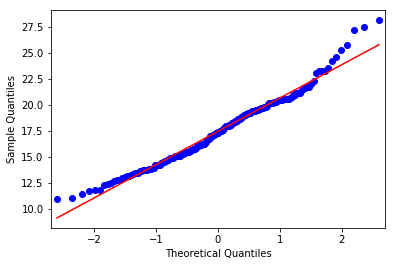

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import matplotlib as plt
from numpy.random import randn
from numpy import concatenate

d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/w-data.csv")
cfep = d.loc[d.diagnosis == 'M'].radius_mean # elisa primera
cfes = d.loc[d.diagnosis == 'M'].texture_mean # elisa segunda
cfmp = d.loc[d.diagnosis == 'B'].radius_mean # moi primera
cfms = d.loc[d.diagnosis == 'B'].texture_mean # moi segunda

layout = {'xaxis': {'range': [0, 100]}, 'yaxis': {'range': [0, 1]}, \
    'shapes': [{'type': 'line', 'x0': 70, 'y0': 0, 'x1': 70, 'y1': 1, \
            'line': {'color': 'rgb(255, 0, 0)', 'width': 2}}]}

py.iplot({'data': [go.Histogram(x = cfms, histnorm='probability')], 'layout': layout}, filename='moi-cf2da')

unimodal = 15 * randn(1000) + 75 # varianza 15, media 75
bimodal = concatenate((unimodal, 20 * randn(1000) + 45)) # lo mismo pero ahora con un segundo bulto agregado

f = qqplot(cfep, line='s')
#plt.savefig(f, "qq_cfep.png")

Cuando se observa que se tiene esa línea roja atravesando los datos, significa que son más o menos normales.

In [9]:
import pandas as pd
from numpy.random import randn
from numpy.random import seed
from numpy import concatenate, isnan
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/w-data.csv")

seed(7)
nd = 15 * randn(1000) + 75
datos = {'Maligno - Radio': d.loc[d.diagnosis == 'M'].radius_mean , \
         'Maligno - Textura': d.loc[d.diagnosis == 'M'].texture_mean, \
         'Benigno - Radio': d.loc[d.diagnosis == 'B'].radius_mean, \
         'Benigno - Textura': d.loc[d.diagnosis == 'B'].texture_mean, \
         'unim': nd, \
         'bim': concatenate((nd, 20 * randn(1000) + 45))}

from scipy.stats import shapiro
for alpha in [0.05, 0.01]:
    for data in datos:
        crudos = datos[data]
        s, p = shapiro(crudos[~isnan(crudos)]) # es MUY importante quitar los NaN
        print('{:s} {:.2f} {:.3f}'.format(data, s, p))
        if p > alpha:
            print('aceptablemente normal con nivel de significancia', alpha)
        else:
            print('no parece ser normal con nivel de significancia', alpha)

Maligno - Radio 0.98 0.002
no parece ser normal con nivel de significancia 0.05
Maligno - Textura 0.97 0.000
no parece ser normal con nivel de significancia 0.05
Benigno - Radio 1.00 0.668
aceptablemente normal con nivel de significancia 0.05
Benigno - Textura 0.94 0.000
no parece ser normal con nivel de significancia 0.05
unim 1.00 0.834
aceptablemente normal con nivel de significancia 0.05
bim 0.99 0.000
no parece ser normal con nivel de significancia 0.05
Maligno - Radio 0.98 0.002
no parece ser normal con nivel de significancia 0.01
Maligno - Textura 0.97 0.000
no parece ser normal con nivel de significancia 0.01
Benigno - Radio 1.00 0.668
aceptablemente normal con nivel de significancia 0.01
Benigno - Textura 0.94 0.000
no parece ser normal con nivel de significancia 0.01
unim 1.00 0.834
aceptablemente normal con nivel de significancia 0.01
bim 0.99 0.000
no parece ser normal con nivel de significancia 0.01


Después tenemos las pruebas con la librería ssl y numpy, que nos dice que la mayoría de los datos no son normales.

In [14]:
import pandas as pd
from numpy.random import randn
from numpy.random import seed
from numpy import concatenate, isnan
from scipy.stats import mannwhitneyu
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/w-data.csv")

seed(7)
nd = 15 * randn(1000) + 75
datos = {'Maligno-Radio': d.loc[d.diagnosis == 'M'].radius_mean , \
         'Maligno-Textura': d.loc[d.diagnosis == 'M'].texture_mean, \
         'Benigno-Radio': d.loc[d.diagnosis == 'B'].radius_mean, \
         'Benigno-Textura': d.loc[d.diagnosis == 'B'].texture_mean, \
         'unim': nd, \
         'bim': concatenate((nd, 20 * randn(1000) + 45))}

def prueba(c1, c2):
    d1 = c1[~isnan(c1)]
    d2 = c2[~isnan(c2)]
    n1 = len(d1)
    n2 = len(d2)
    if min(n1, n2) < 20:
        print('hay muy pocos datos como para obtener un resultado confiable')
        return
    for alpha in [0.05, 0.01]:
        s, p = mannwhitneyu(d1, d2)
        print('{:d} {:d} {:.2f} {:.3f}'.format(n1, n2, s, p))
        if p > alpha:
            print('son igualmente distribuidos con nivel de significancia', alpha)
        else:
            print('se ven diferentemente distribuidos con nivel de significancia', alpha)

print("Maligno")
prueba(datos['Maligno-Radio'], datos['Maligno-Textura'])
print("Benigno")
prueba(datos['Benigno-Radio'], datos['Benigno-Textura'])

Maligno
212 212 8487.50 0.000
se ven diferentemente distribuidos con nivel de significancia 0.05
212 212 8487.50 0.000
se ven diferentemente distribuidos con nivel de significancia 0.01
Benigno
357 357 8299.50 0.000
se ven diferentemente distribuidos con nivel de significancia 0.05
357 357 8299.50 0.000
se ven diferentemente distribuidos con nivel de significancia 0.01


Cuando se realiza una prueba más, se puede observar que los datos introducidos tienen una distribución distinta, dandole dos niveles de significancia, en ambos casos de diagnóstico Benigno y Maligno. 

In [13]:
import pandas as pd
from numpy import isnan, nan
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/w-data.csv")
from scipy.stats import wilcoxon

pares = dict()
pedazo = d.loc[~isnan(d.diagnosis == 'M') & ~isnan(d.diagnosis == 'B')]
pares['diagnosis'] = (pedazo.radius_mean, pedazo.texture_mean)


for datos in pares:
    (d1, d2) = pares[datos]
    n1 = len(d1)
    n2 = len(d2)
    if min(n1, n2) < 20:
        print('hay muy pocos datos de {:s} como para obtener un resultado confiable'.format(datos))
    else:
        for alpha in [0.05, 0.01]:
            s, p = wilcoxon(d1, d2)
            print('{:s} {:d} {:d} {:.2f} {:.3f}'.format(datos, n1, n2, s, p))
            if p > alpha:
                print('son igualmente distribuidos con nivel de significancia', alpha)
            else:
                print('se ven diferentemente distribuidos con nivel de significancia', alpha)

diagnosis 569 569 7362.50 0.000
se ven diferentemente distribuidos con nivel de significancia 0.05
diagnosis 569 569 7362.50 0.000
se ven diferentemente distribuidos con nivel de significancia 0.01


En el último dato no se separan los diagnosticos en maligno y benigno, y aun asi, con ambas significancias da como resultado que los datos son diferentemente distribuidos.